# Kmeans Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for grouping similar data points together. It's a simple yet effective technique for segmenting unlabeled data, making it a cornerstone of exploratory data analysis.

**Step 1**- Start with K centroids by putting them at random place.

**Step 2**- Compute distance of every points from centroids and clusterm them accordingly.

**Step 3** - Adjust centroids so that they become center of gracity for given cluster

**Step 4**- Again Re-cluster every points based on their distance with centroid.

**Step 5** - Again adjusts centroid

**Step 6** - Recomputer clusters and repeat this till data points stop changing clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/Wholesale_customers_data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
from sklearn.preprocessing import StandardScaler



In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [10]:
pd.DataFrame(scaler.inverse_transform(data_scaled), columns=data.columns)



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...
435,1.0,3.0,29703.0,12051.0,16027.0,13135.0,182.0,2204.0
436,1.0,3.0,39228.0,1431.0,764.0,4510.0,93.0,2346.0
437,2.0,3.0,14531.0,15488.0,30243.0,437.0,14841.0,1867.0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [11]:
data_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [12]:
Kmeans = KMeans(n_clusters=2, init = 'k-means++', verbose = 5)
Kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4157.3871996340895.
Iteration 1, inertia 3141.4288105200717.
Iteration 2, inertia 3129.9958226352937.
Iteration 3, inertia 3129.6084230584356.
Iteration 4, inertia 3128.896115646011.
Iteration 5, inertia 3128.1112718292256.
Iteration 6, inertia 3127.0147652451215.
Iteration 7, inertia 3125.9975126964473.
Iteration 8, inertia 3125.5192865395925.
Iteration 9, inertia 3125.099598235821.
Iteration 10, inertia 3124.9571945745115.
Iteration 11, inertia 3124.8765886271985.
Iteration 12, inertia 3124.76794594941.
Iteration 13, inertia 3124.7077144738337.
Iteration 14, inertia 3124.6407896132805.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 3323.2574038051957.
Iteration 1, inertia 2698.9274212344553.
Iteration 2, inertia 2665.686082567425.
Iteration 3, inertia 2637.5696385034626.
Iteration 4, inertia 2615.0842467869065.
Iteration 5, inertia 2602.1534374797075.
Iteration 6, inertia 2599.439912785305.
Iter

KMeans(n_clusters=2, verbose=5)

In [13]:
Kmeans.inertia_

2599.3873849123092

In [ ]:
SSE = []
for cluster in range(1, 20):
  Kmeans = KMeans(n_clusters = cluster, init = 'k-means++', verbose = 5)
  Kmeans.fit(data_scaled)
  SSE.append(Kmeans.inertia_)

In [ ]:
# Converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1, 20), 'SSE': SSE})
plt.figure(figsize = (12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
Kmeans = KMeans(n_clusters = 5, init = 'k-means++')
Kmeans.fit(data_scaled)
pred = Kmeans.predict(data_scaled)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 2,
       0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 3, 4, 4, 1, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 4, 1, 1, 4, 1,

In [24]:
import seaborn as sns


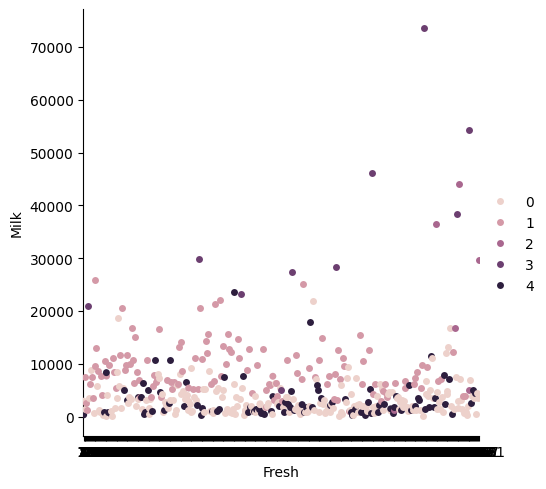

In [25]:
sns.catplot(x=data['Fresh'], y = data['Milk'], hue = pred)

In [26]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 2,
       0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 3, 4, 4, 1, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 4, 1, 1, 4, 1,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


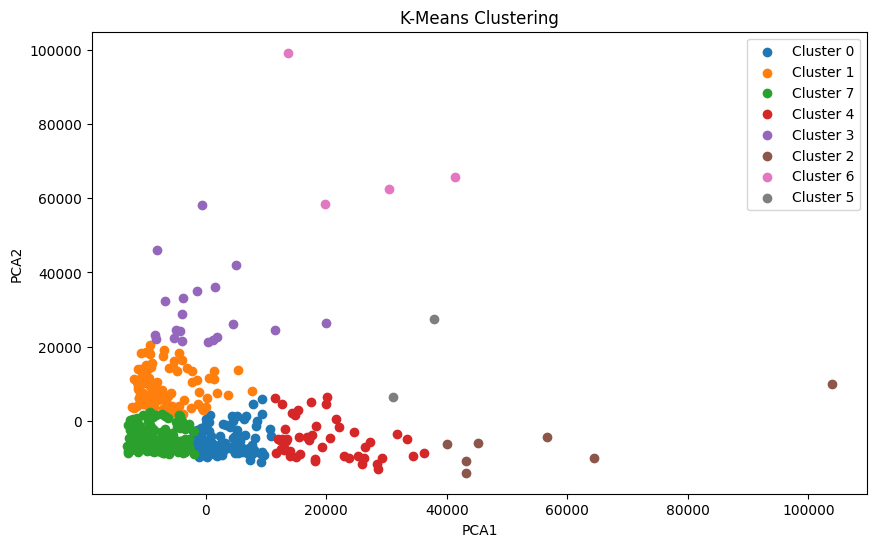

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df=pd.read_csv("/content/drive/MyDrive/data/Wholesale_customers_data.csv")

# Extract features for clustering
features = df.drop(['Channel', 'Region'], axis=1)

# Perform k-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)

df['Cluster'] = kmeans.fit_predict(features)

# Reduce dimensionality for visualization (using PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Add reduced features to the dataframe
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    plt.scatter(
        df[df['Cluster'] == cluster]['PCA1'],
        df[df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )

plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
